# Networks

Networks are another important data structure in transportaiton.  Think roadway networks in particular, but many things can be represented as a network.  We'll go over a few basics in class. 

MPOs or DOTs with a travel model will maintain a network representation of the street network for use in the model.  This will have the attributes the model needs: free flow speed, capacity, length, directionality, turn restrictions, facility type, etc.  Usually, the best way to get a copy is to call up your friendly local transportation modler and ask.  Even in this tech-crazy world, it is amazing how far asking politely will get you...

...however, that's not what we're going to do here.  Instead, we are going to work with network data from OpenStreetMap: 

http://www.openstreetmap.org/

To make it easier, we will work with a package called OSMnx, by Geoff Boeing. You can read a paper on the toolkit here: 

https://www.researchgate.net/publication/309738462_OSMNX_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks

And a blog post here: 

http://geoffboeing.com/2016/11/osmnx-python-street-networks/


### Homework

Your homework is to: 

1. Read the network paper linked above. 

2. Use the blog post to figure out how to install and use the package. 

3. Get the street network for Lexington.  

4. Print the basic_stats for the network. 

5. Calculate and show the shortest path from your home (or another point of interest) to UK campus.  Is this the route you would take?  What is the same or different?

6. Repeat step 5 for three other trips that you make regularly.  

 

In [74]:
import osmnx as ox
import networkx as nx
from IPython.display import IFrame

C:\Anaconda\lib\socket.py:646: ResourceWarning: unclosed <socket.socket fd=1872, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('10.163.143.34', 49317), raddr=('193.63.75.109', 443)>
  self._sock = None


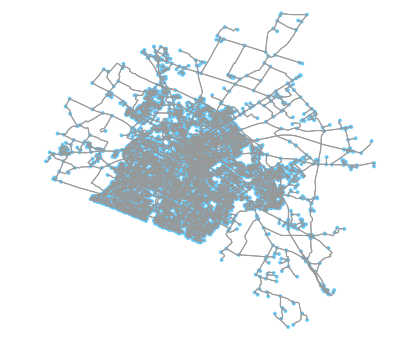

(<matplotlib.figure.Figure at 0x244d2bb0b70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2449396c550>)

In [42]:
places = {'county':'Fayette', 'state':'Kentucky'}
G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

C:\Anaconda\lib\socket.py:646: ResourceWarning: unclosed <socket.socket fd=1232, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('10.163.143.34', 49681), raddr=('193.63.75.109', 443)>
  self._sock = None


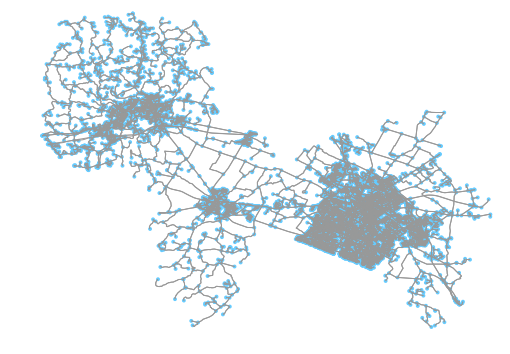

(<matplotlib.figure.Figure at 0x24490fc95c0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x244830c7668>)

In [57]:
places = [
          {'county':'Franklin', 'state':'Kentucky'}]
F = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

In [44]:
G = ox.graph_from_place({'county':'Fayette', 'state':'Kentucky'}, network_type='drive')
basic_stats = ox.basic_stats(G)
basic_stats

C:\Anaconda\lib\socket.py:646: ResourceWarning: unclosed <socket.socket fd=2036, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('10.163.143.34', 49340), raddr=('193.63.75.109', 443)>
  self._sock = None


{'circuity_avg': 1.0812431600009695,
 'count_intersections': 7837,
 'edge_density_km': None,
 'edge_length_avg': 176.81000036189965,
 'edge_length_total': 4540657.6192939449,
 'intersection_density_km': None,
 'k_avg': 4.893483231707317,
 'm': 25681,
 'n': 10496,
 'node_density_km': None,
 'self_loop_proportion': 0.010786184338616098,
 'street_density_km': None,
 'street_length_avg': 181.28852137523953,
 'street_length_total': 2563238.4037245116,
 'street_segments_count': 14139,
 'streets_per_node_avg': 2.6744474085365852,
 'streets_per_node_counts': {0: 0,
  1: 2659,
  2: 36,
  3: 5905,
  4: 1856,
  5: 39,
  6: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2533346036585366,
  2: 0.003429878048780488,
  3: 0.5625952743902439,
  4: 0.17682926829268292,
  5: 0.003715701219512195,
  6: 9.527439024390244e-05}}

C:\Anaconda\lib\socket.py:646: ResourceWarning: unclosed <socket.socket fd=1352, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('10.163.143.34', 49990), raddr=('193.63.75.109', 443)>
  self._sock = None
C:\Anaconda\lib\socket.py:646: ResourceWarning: unclosed <socket.socket fd=1352, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('10.163.143.34', 49991), raddr=('193.63.75.109', 443)>
  self._sock = None
C:\Anaconda\lib\socket.py:646: ResourceWarning: unclosed <socket.socket fd=1964, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('10.163.143.34', 49993), raddr=('193.63.75.109', 443)>
  self._sock = None


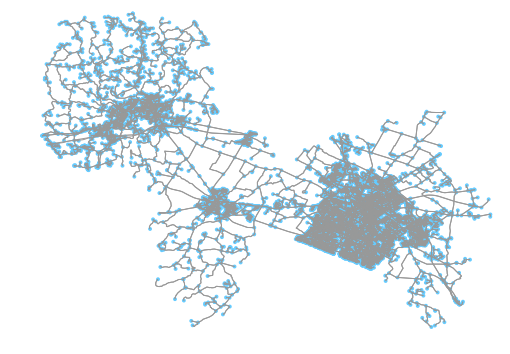

(<matplotlib.figure.Figure at 0x244da045080>,
 <matplotlib.axes._subplots.AxesSubplot at 0x244da0202b0>)

In [62]:
places = [
          {'county':'Franklin', 'state':'Kentucky'},
          {'county':'Fayette', 'state':'Kentucky'},
          {'county':'Woodford', 'state':'Kentucky'},          ]
G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

AttributeError: module 'pandas' has no attribute 'dataFrame'

In [70]:
# use networkx to calculate the shortest path between two nodes
origin_node = 163422066
destination_node = 163430370

route = nx.shortest_path(G, origin_node, destination_node)

In [71]:
# plot the route with folium
route_map = ox.plot_route_folium(G, route)

In [75]:
# save as html file then display map as an iframe
filepath = 'route.html'
route_map.save(filepath)
IFrame(filepath, width=600, height=500)